In [1]:
import pandas as pd
df = pd.read_csv('bengaluru_house_prices.csv')
print(df.head())

              area_type   availability                  location       size  \
0  Super built-up  Area         19-Dec  Electronic City Phase II      2 BHK   
1            Plot  Area  Ready To Move          Chikka Tirupathi  4 Bedroom   
2        Built-up  Area  Ready To Move               Uttarahalli      3 BHK   
3  Super built-up  Area  Ready To Move        Lingadheeranahalli      3 BHK   
4  Super built-up  Area  Ready To Move                  Kothanur      2 BHK   

   society total_sqft  bath  balcony   price  
0  Coomee        1056   2.0      1.0   39.07  
1  Theanmp       2600   5.0      3.0  120.00  
2      NaN       1440   2.0      3.0   62.00  
3  Soiewre       1521   3.0      1.0   95.00  
4      NaN       1200   2.0      1.0   51.00  


In [8]:
total_missing = df.isnull().sum().sum()
print(f"Total number of missing values: {total_missing}")

#compute the percentage of missing values and drop columns with more than 15% missing values
missing_percentage = df.isnull().mean() * 100
columns_to_keep = ['location', 'size', 'total_sqft']
columns_to_drop = missing_percentage[missing_percentage > 15].index.difference(columns_to_keep)
df.drop(columns=columns_to_drop, inplace=True)


Total number of missing values: 699


In [10]:
most_missing_column = missing_percentage.idxmax()
print(f"Column with the most number of missing values: {most_missing_column}")

Column with the most number of missing values: balcony


In [12]:
df.dropna(subset=['location', 'size', 'total_sqft'], inplace=True)

In [16]:
#Drop rows in the 'bath' column containing more than 5 bathrooms
df = df[df['bath'] <= 5]

In [22]:
#Find the number of houses available in each area
houses_per_area = df['location'].value_counts()
print(houses_per_area)

location
Whitefield                        530
Sarjapur  Road                    384
Electronic City                   301
Kanakpura Road                    262
Thanisandra                       230
                                 ... 
Okalipura                           1
Vasantapura main road               1
1st Stage Radha Krishna Layout      1
Dwarka Nagar                        1
Abshot Layout                       1
Name: count, Length: 1260, dtype: int64


In [24]:
top_five_areas = houses_per_area.head(5)
print(top_five_areas)

location
Whitefield         530
Sarjapur  Road     384
Electronic City    301
Kanakpura Road     262
Thanisandra        230
Name: count, dtype: int64


In [26]:
import matplotlib.pyplot as mapo
import seaborn as sebo

In [28]:
top_areas_df = df[df['location'].isin(top_five_areas.index)]

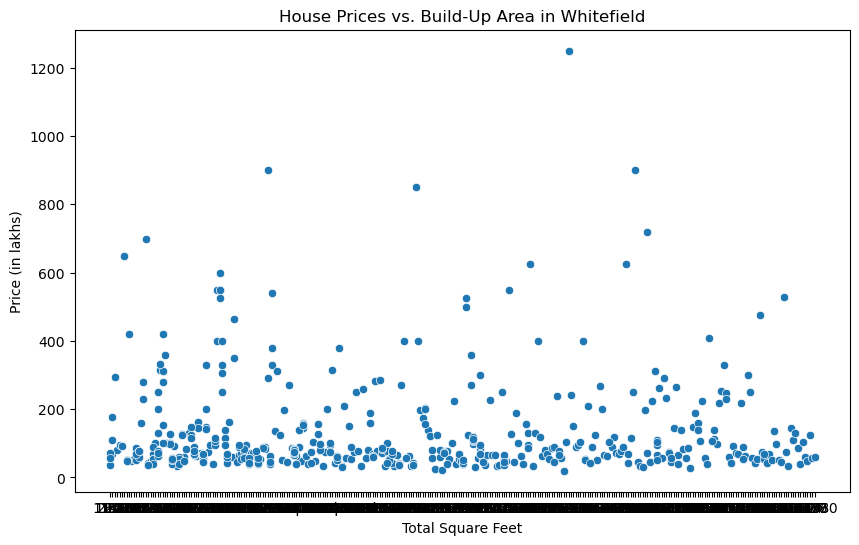

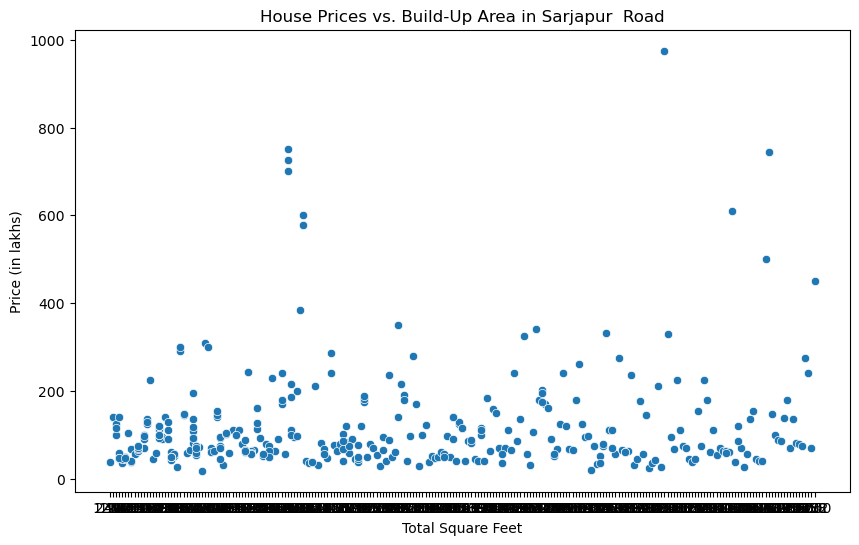

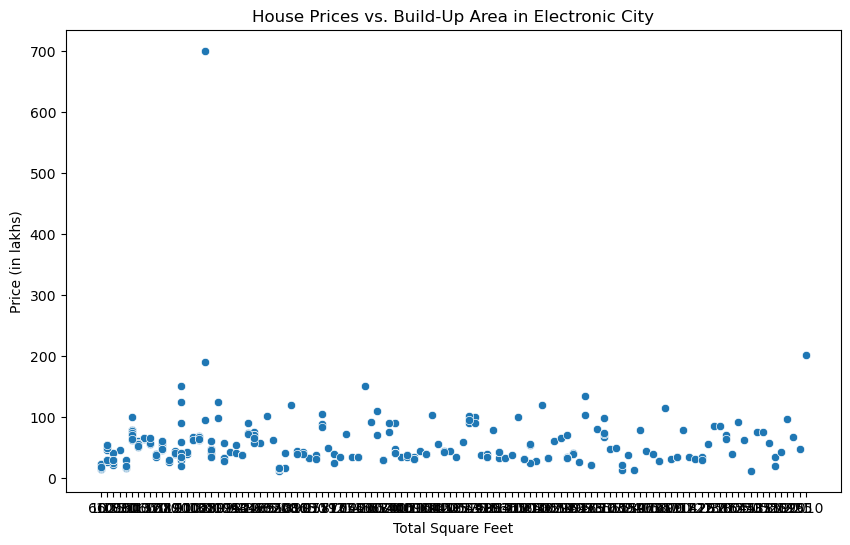

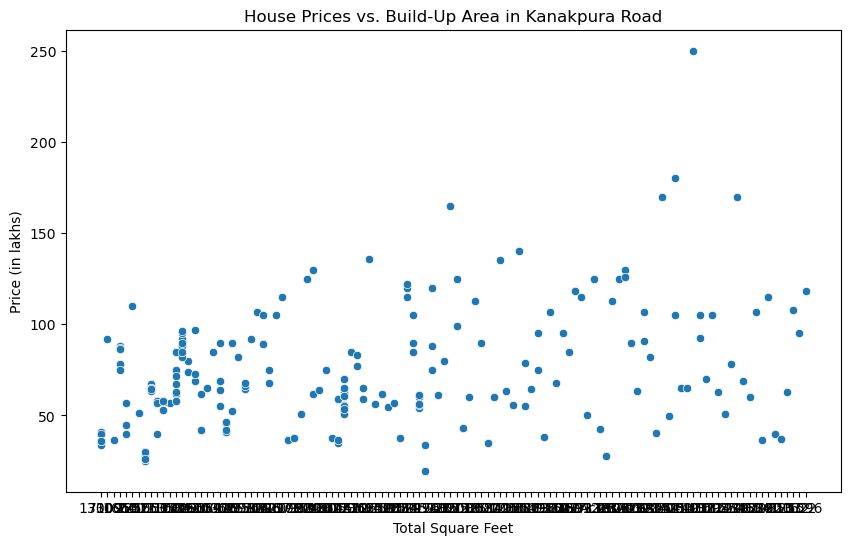

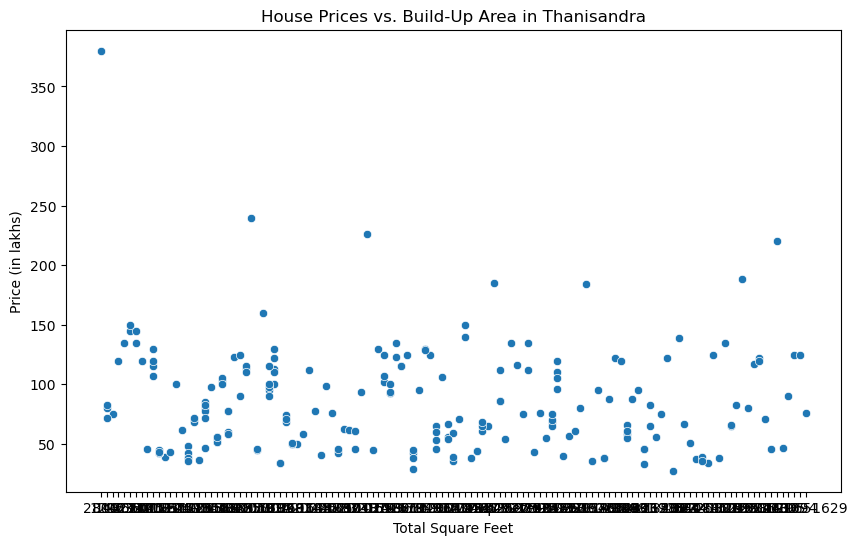

In [30]:
for area in top_five_areas.index:
    area_df = top_areas_df[top_areas_df['location'] == area]
    mapo.figure(figsize=(10, 6))
    sebo.scatterplot(x='total_sqft', y='price', data=area_df)
    mapo.title(f'House Prices vs. Build-Up Area in {area}')
    mapo.xlabel('Total Square Feet')
    mapo.ylabel('Price (in lakhs)')
    mapo.show()